# Deeper architectures with AdamW

In [1]:
from figures.utils import plot_kl_divergence_simple, plot_val_loss_simple, fetch_run_data

/Users/rodrigoalvarezlucendo/Projects/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/Users/rodrigoalvarezlucendo/Projects/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated`

In [2]:
TWO_LAYER_MINIMAL = "u5m1g032"
TWO_LAYER_FULL = "h22em72r"

# 2-layer Minimal Model

In [3]:
# SANITY CHECKS TO MAKE SURE THE CONFIG IS AS EXPECTED
conf = fetch_run_data(TWO_LAYER_MINIMAL, metrics=["val_loss"])['config']
student = conf['student']
num_blocks = student['num_blocks']
use_mlp = student['use_mlp']

assert num_blocks == 2, "Expected num_blocks to be 2"
assert use_mlp is False, "Expected mimial architecture without MLP"

optimizer = conf['optimizer']
optimizer

{'lr': 0.04, '_target_': 'torch.optim.AdamW', 'weight_decay': 0.01}

Saved figure to figures/adamw_2layer_minimal.pdf


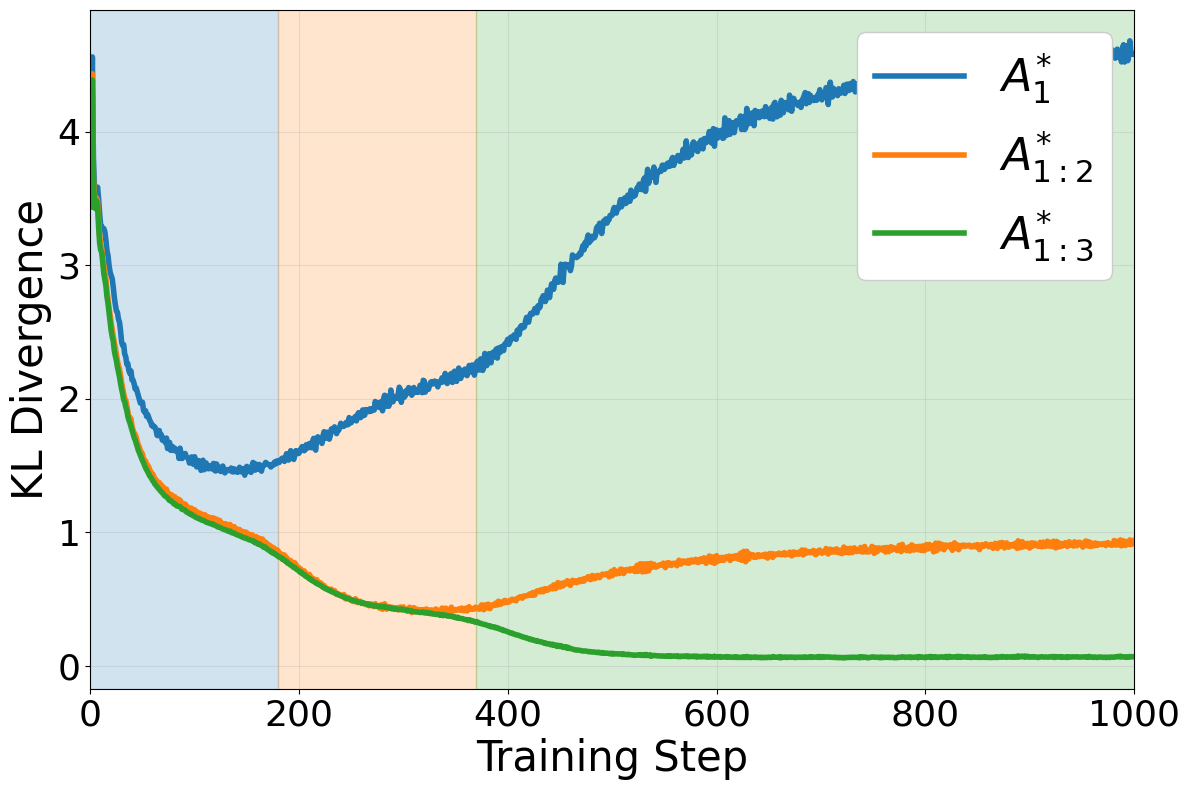

In [4]:
plot_kl_divergence_simple(
    run_id=TWO_LAYER_MINIMAL,
    learnable=False,
    divergence_steps=[2180, 2370],
    shift_steps=2000,
    max_steps=3000,
    save_name="figures/adamw_2layer_minimal"
)

Saved figure to figures/val_loss_2layer_minimal.pdf


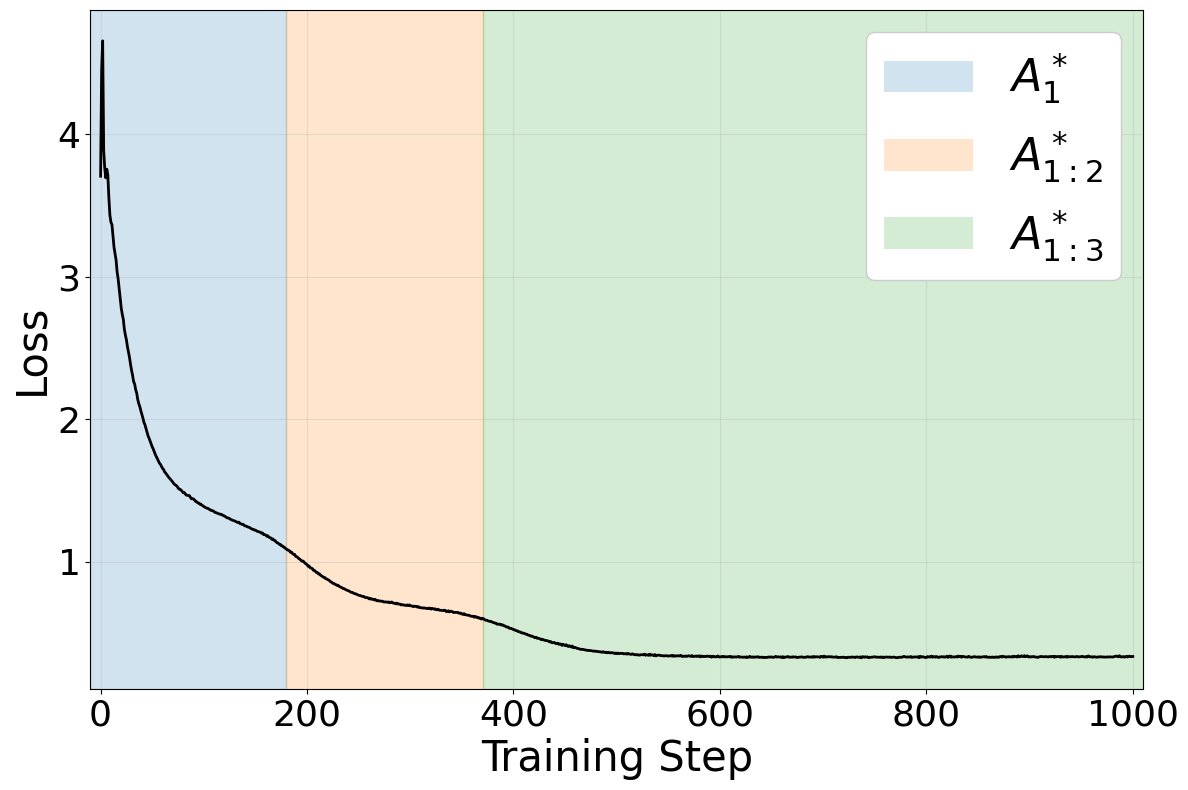

In [11]:
plot_val_loss_simple(
    run_id=TWO_LAYER_MINIMAL,
    divergence_steps=[2180, 2370],
    shift_steps=2000,
    max_steps=3000,
    save_name="figures/val_loss_2layer_minimal"
)

# 2-layer Full Model

In [6]:
# SANITY CHECKS TO MAKE SURE THE CONFIG IS AS EXPECTED
conf = fetch_run_data(TWO_LAYER_FULL, metrics=["val_loss"])['config']
student = conf['student']
num_blocks = student['num_blocks']
use_mlp = student['use_mlp']

assert num_blocks == 2, "Expected num_blocks to be 2"
assert use_mlp is True, "Expected full model with MLP"

optimizer = conf['optimizer']
optimizer

{'lr': 0.001, '_target_': 'torch.optim.AdamW', 'weight_decay': 0.01}

Saved figure to figures/adamw_2layer_full.pdf


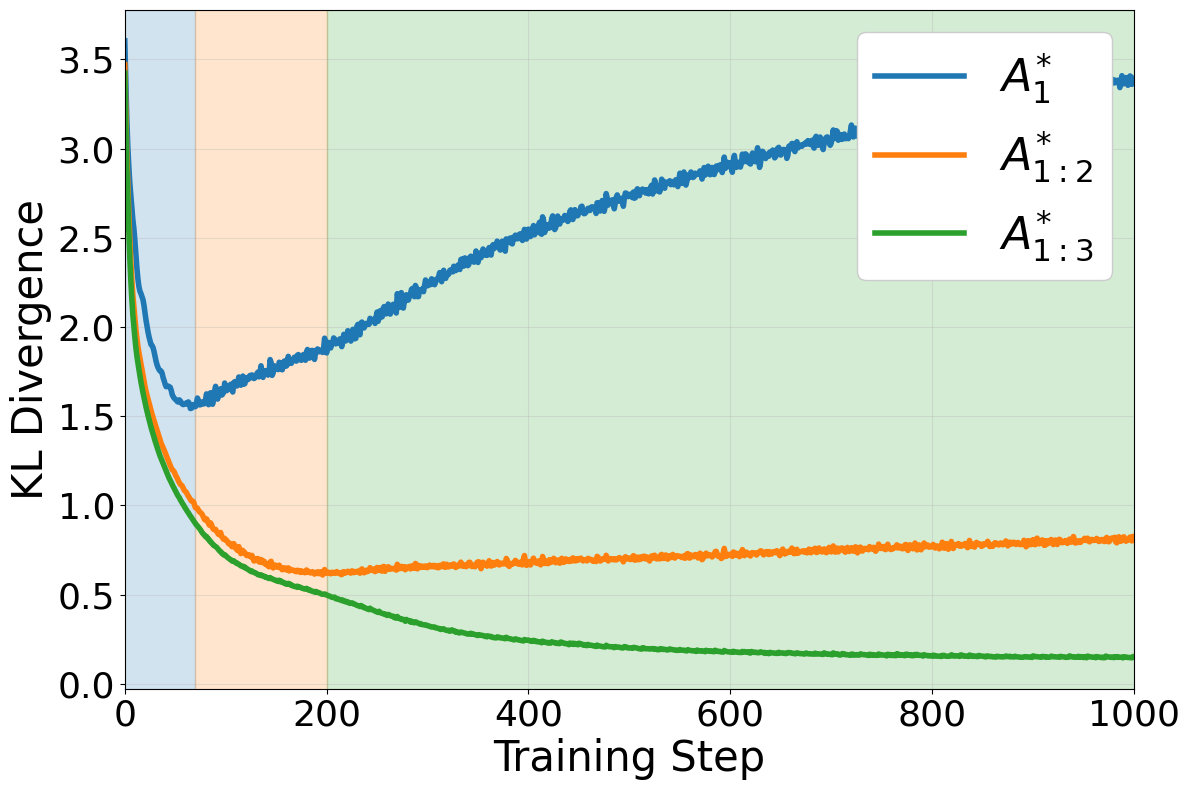

In [7]:
plot_kl_divergence_simple(
    run_id=TWO_LAYER_FULL,
    learnable=False,
    divergence_steps=[2070, 2200],
    shift_steps=2000,
    max_steps=3000,
    save_name="figures/adamw_2layer_full"
)

Saved figure to figures/val_loss_2layer_full.pdf


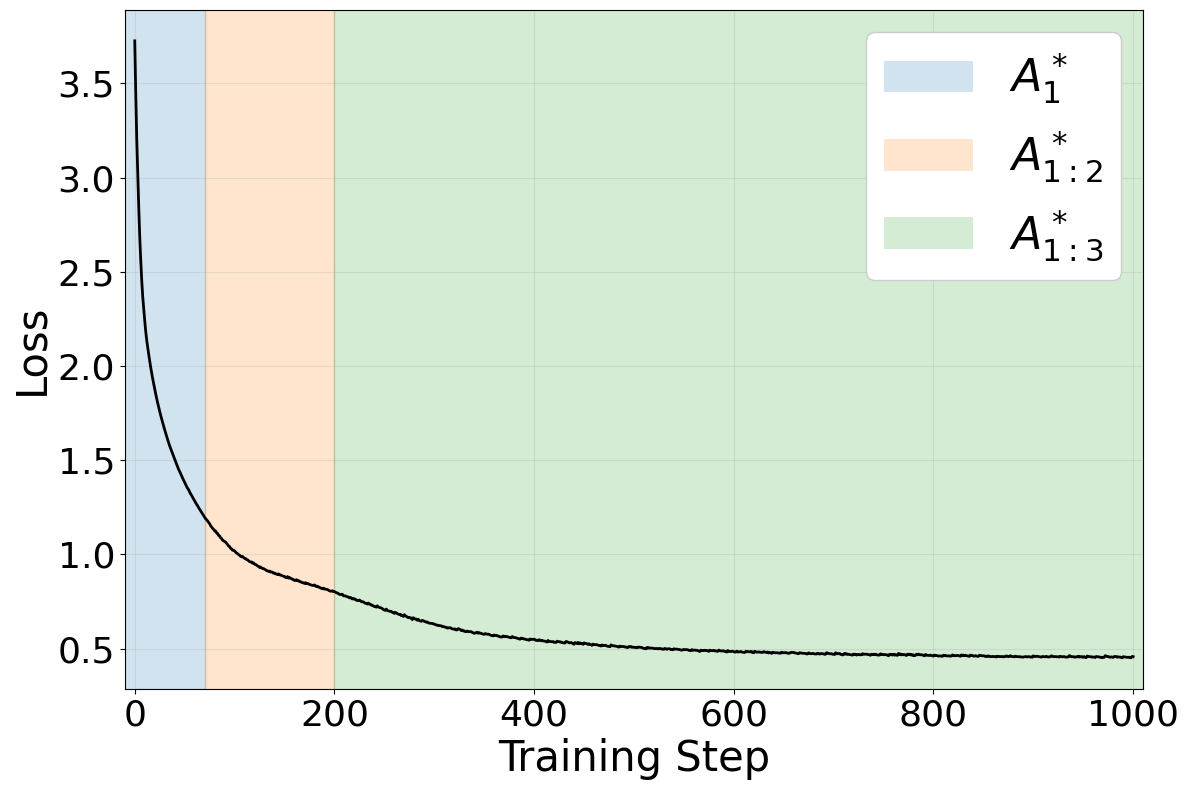

In [10]:
plot_val_loss_simple(
    run_id=TWO_LAYER_FULL,
    divergence_steps=[2070, 2200],
    shift_steps=2000,
    max_steps=3000,
    save_name="figures/val_loss_2layer_full"
)